# Homework 7
## Name Visualization

In this homework, I created a function (plot_names) that takes a list of names, a gender, beginning year, and ending year as the parameters. The function plots a bar of the percentage of that specific name for the specified gender for the year. It will plot bars for the range of years specified.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_ssn(begin_year,end_year):
    all_years = pd.DataFrame()
    years = range(begin_year,end_year+1)
    
    for y in years:
        f = '/Users/taylorlast/Documents/GitHub/School/Python/names/yob{}.txt'.format(y)
        df = pd.read_csv(f,names=["names","gender","count"])
        df.insert(0,"year",y)
        all_years = pd.concat([all_years,df],axis=0)
        
        male=all_years[all_years.gender=="M"]
        female=all_years[all_years.gender=="F"]
        
        female_grouped=female.groupby('year')
        male_grouped=male.groupby('year')
        
        female_count=female_grouped['count'].sum()
        male_count=male_grouped['count'].sum()
        
    return {'All years' : all_years, 'Female Count' : female_count, 'Male Count': male_count}

#Test Case
read_ssn(1900,1905)

{'All years':       year     names gender  count
 0     1900      Mary      F  16706
 1     1900     Helen      F   6343
 2     1900      Anna      F   6114
 3     1900  Margaret      F   5304
 4     1900      Ruth      F   4765
 ...    ...       ...    ...    ...
 3650  1905   Wilburt      M      5
 3651  1905   Wilfrid      M      5
 3652  1905   Willian      M      5
 3653  1905  Winifred      M      5
 3654  1905   Woodson      M      5
 
 [20849 rows x 4 columns],
 'Female Count': year
 1900    299798
 1901    239345
 1902    264076
 1903    261971
 1904    275363
 1905    291619
 Name: count, dtype: int64,
 'Male Count': year
 1900    150480
 1901    106469
 1902    122659
 1903    119232
 1904    128126
 1905    132311
 Name: count, dtype: int64}

In [3]:
def plot_names(*args, sex, begin_year = 1880, end_year = 2018):
    
    df = read_ssn(begin_year, end_year)['All years']
    if sex == 'M':
        df_total_gender = read_ssn(begin_year, end_year)['Male Count']
    elif sex == 'F':
        df_total_gender = read_ssn(begin_year, end_year)['Female Count']
    else:
        pass
    
    df = df[df.gender == sex]
    df_names = df[df['names'].isin(args)]
    df_final = pd.merge(df_names,df_total_gender,on = 'year',how='inner')
    df_final['percent'] = (df_final['count_x'] / df_final['count_y'])*100
    years = range(begin_year,end_year+1)

    df_final = df_final.set_index('year')
    df_final = df_final[['names','percent']]

    fig, ax = plt.subplots(figsize = (10,8))
    xpos = np.arange(len(years))
    
    for arg in args:
        temp = df_final[df_final['names'] == arg]['percent']
        ax.bar(x=years,height=temp, width = .5, label = arg,alpha=.5)
        ax.legend()
        ax.set_title('Popularity of names by gender')
        ax.set_xlabel('year')
        ax.set_ylabel('percent of newborns with name')

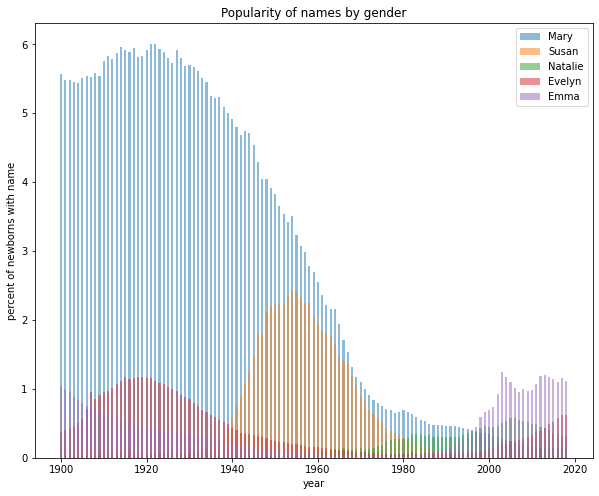

In [4]:
plot_names("Mary","Susan","Natalie","Evelyn","Emma",sex="F",begin_year=1900,end_year=2018)

<Figure size 720x360 with 0 Axes>

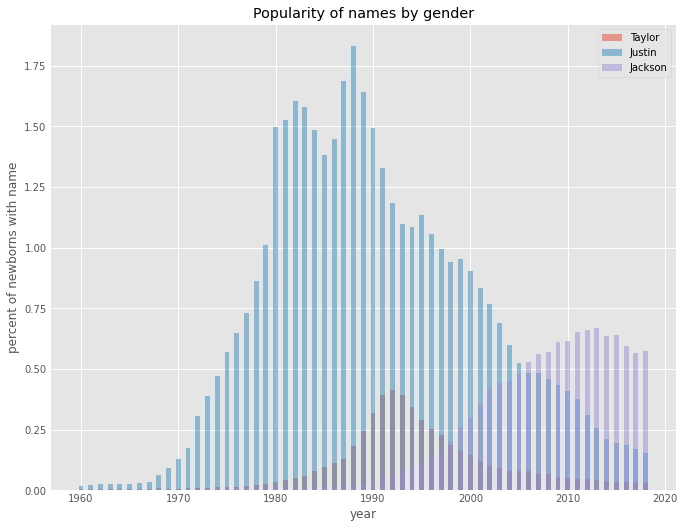

In [23]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plot_names("Taylor","Justin","Jackson",sex = "M",begin_year=1960,end_year=2018)
plt.savefig('name-example')